# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [15]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [18]:
df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

In [19]:
#df.head(20)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [21]:
df = df.drop(labels='Collections', axis='columns')

# converting cuisines columns data type to list
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(", "))

# converting Cost columns data type to int
df['Cost'] = df['Cost'].apply(lambda x: int(x.replace(',',"")))

In [22]:
df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [23]:
cuisine_list = []
for elem in df['Cuisines']:
    for cuisine in elem:
        if cuisine not in cuisine_list:
            cuisine_list.append(cuisine)
print(len(cuisine_list))     

44


In [24]:
df_cuisine = pd.DataFrame(columns=cuisine_list)
df = pd.concat([df, df_cuisine], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Links          105 non-null    object
 2   Cost           105 non-null    int64 
 3   Cuisines       105 non-null    object
 4   Timings        104 non-null    object
 5   Chinese        0 non-null      object
 6   Continental    0 non-null      object
 7   Kebab          0 non-null      object
 8   European       0 non-null      object
 9   South Indian   0 non-null      object
 10  North Indian   0 non-null      object
 11  Biryani        0 non-null      object
 12  Asian          0 non-null      object
 13  Mediterranean  0 non-null      object
 14  Desserts       0 non-null      object
 15  Seafood        0 non-null      object
 16  Beverages      0 non-null      object
 17  Goan           0 non-null      object
 18  Healthy Food   0 non-null      obje

In [26]:
#df.head()

<AxesSubplot:xlabel='Cost', ylabel='Density'>

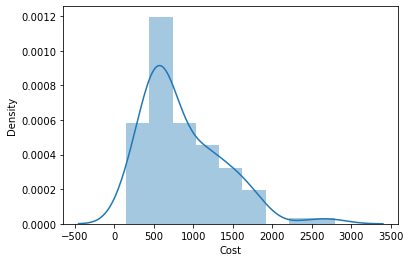

In [27]:
sns.distplot(a=df['Cost'])

In [28]:
columns = list(df.columns)
columns = columns[5:]
for row in range(105):
    for column in columns:
        for elem in df.iloc[row, 3]:
            if elem == column:
                df.loc[row, column] = 1
df = df.fillna(0)                

In [29]:
df.head()

,Name,Links,Cost,Cuisines,Timings,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,Desserts,Seafood,Beverages,Goan,Healthy Food,Lebanese,American,Ice Cream,Street Food,Fast Food,BBQ,Italian,Finger Food,Burger,Japanese,Salad,Sushi,Mexican,Mughlai,Andhra,Bakery,Juices,Arabian,Hyderabadi,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
